#Problem set 4
#Name: Yuqian Gong

In [277]:
import pip
pip.main(['install','ggplot'])


0

In [262]:
pip.main(['install','pandas'])

0

In [278]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
import copy

In [279]:
#Problem 1
def lognormal_income_sim(p):
    """
    Requires a simulation profile, p, structured as a dictionary
    
    p = {
         "sigma"             : 0.1,     #Standard deviation of the income process
         "rho"               : 0.2,     #Dependence of today's income on last period's income
         "g_rate"            : 0.03,    #Long-run annual growth rate for the annual salary
         "avg_init_income"   : 80000,   #The average starting income for MACSS student
         "yr"                : 40,      #The number of years you will work
         "start_yr"          : int(2019),#The year you starts to work
         "num_draws"         :10000     #The number of simulations 
    }
    """
    
    np.random.seed(524)
    logN_errors = np.random.normal(0, p["sigma"], (p["yr"], p["num_draws"]))
    
    ln_income_mat = np.zeros((p["yr"],p["num_draws"]))
    
    ln_income_mat[0, :] = np.log(p["avg_init_income"]) + logN_errors[0, :]
    
    for yr in range(1, p["yr"]):
        ln_income_mat[yr, :] = (1 - p["rho"]) * (np.log(p["avg_init_income"]) + p["g_rate"] * (yr + \
        p["start_yr"] - 2019)) + p["rho"] * ln_income_mat[yr - 1, :] + logN_errors[yr, :]
        
    income_mat = np.exp(ln_income_mat)
    return income_mat
    
    

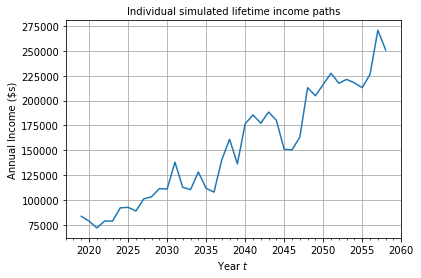

In [280]:
simulation_profile = {
        "sigma"             : 0.1, 
        "rho"               : 0.2,     
        "g_rate"            : 0.03,    
        "avg_init_income"   : 80000,   
        "yr"                : 40,      
        "start_yr"          : int(2019),
        "num_draws"         : 10000     
    
}
%matplotlib inline
p = simulation_profile
income_mat = lognormal_income_sim(p)
year_vec = np.arange(p["start_yr"], p["start_yr"] + p["yr"])
individual = 400
fig, ax = plt.subplots()
plt.plot(year_vec, income_mat[:, individual])
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual simulated lifetime income paths', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual Income ($s)')

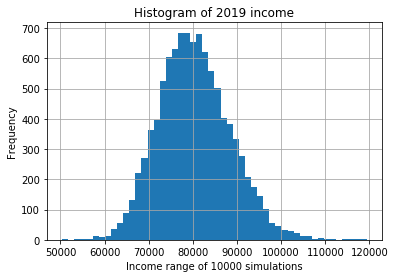

In [304]:
#Problem 2
x = income_mat[0, :]
fig, ax = plt.subplots()
ax.hist(x, 50, range = (x.min(), x.max()), histtype = "bar") 

plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.xlabel('Income range of 10000 simulations')
plt.ylabel('Frequency')
plt.title(r'Histogram of 2019 income')




In [302]:
p1 = np.mean(x > 100000) * 100
p2 = np.mean(x < 70000) * 100
print("The percentage of our class will earn more than $100,000 is {}%".format(p1))
print("The percentage of our class will earn less than $70,000 is {}%".format(p2))

The percentage of our class will earn more than $100,000 is 1.27%
The percentage of our class will earn less than $70,000 is 9.02%


In [350]:
#problem 3 
from ggplot import *

def compute_yrs_payloan(income_mat):
    pay_debt = copy.deepcopy(income_mat)
    pay_debt = pay_debt * 0.1
    for yr in range(1, p["yr"]):
        pay_debt[yr, :] += pay_debt[yr - 1, :]
        
    yr_pay_debt = np.zeros(p["num_draws"])
        
    for num in range(p["num_draws"]):
        a = pay_debt[:, num]
        for yr in range(0, p["yr"]):
            if a[yr] >= 95000:
                yr_pay_debt[num] = yr + 1
                break 
                
    percent_under_10 = np.mean(yr_pay_debt <= 10) * 100
    
    yr_count = {}
    for num_yr in yr_pay_debt:
        yr_count[int(num_yr)] = yr_count.get(int(num_yr), 0) + 1

    yr_ls = []
    for k, v in yr_count.items():
        yr_ls.append((k, v/10000 * 100))
    
    
    yr_ls.sort()
    return yr_ls, percent_under_10



In [351]:
income_mat = lognormal_income_sim(simulation_profile)
yr_ls, percent_under_10 = compute_yrs_payloan(income_mat)
print("The percentage of the simulations that are able to \
pay off the loan in 10 years is {:2f}%".format(percent_under_10))


#we can see that the percentage of simulations that I am able to
#pay off the loan in 10 years is  18.47%

The percentage of the simulations that are able to pay off the loan in 10 years is 18.470000%


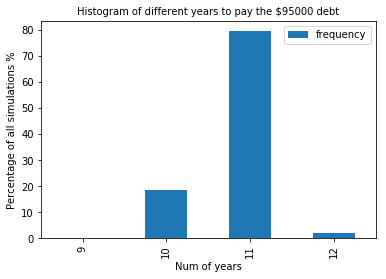

In [352]:
import pandas as pd

def plot_yrs_payload_hist(yr_ls):
    df = pd.DataFrame(data = yr_ls, columns = ["num of years", "frequency"])
    df.plot(kind='bar', x='num of years')
    plt.title('Histogram of different years to pay the $95000 debt', fontsize=10)
    plt.xlabel(r'Num of years')
    plt.ylabel(r'Percentage of all simulations %')

plot_yrs_payload_hist(yr_ls)


In [353]:
#Problem 4
p2 = copy.deepcopy(p)
p2["avg_init_income"] = 85000
p2["sigma"] = 0.15
income_mat2 = lognormal_income_sim(p2)
yr_ls, percent_under_10 = compute_yrs_payloan(income_mat2)
print("The percentage of the simulations that are able to \
pay off the loan in 10 years is {:2f}%".format(percent_under_10))



The percentage of the simulations that are able to pay off the loan in 10 years is 70.200000%


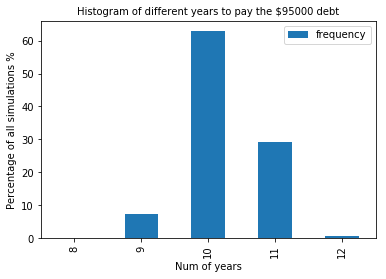

In [354]:
plot_yrs_payload_hist(yr_ls)